#  This Jupyter Notebook contains the codes of various Euler Bernoulli Beam simulations


## Constants definitions

In [3]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)
n = 1280; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = f(N) = 0;

## Both ends fixed

In [2]:
% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 1.0; d0(2) = 7.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Fixed right end
d0(N) = 1.0; d0(N-1) = 7.0;
dp1(N-1) = 0.0;
dp2(N-2) = 0.0;
dm1(N-1) = 0.0;
dm2(N-2) = 0.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =    2.3818e-07


## Both ends Pinned

In [3]:
% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Pinned left end
d0(1) = 1.0; d0(2) = 5.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Pinned right end
d0(N) = 1.0; d0(N-1) = 5.0;
dp1(N-1) = 0.0;
dp2(N-2) = 0.0;
dm1(N-1) = 0.0;
dm2(N-2) = 0.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.*(L^3 - 2.*L*x.^2 + x.^3);

ErrMax = max(abs(y-y_exact))

ErrMax =    9.3123e-08


## Left Fixed, Right Free

In [6]:

% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 1.0; d0(2) = 7.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Free right end
d0(N) = 1.0; d0(N-1) = 5.0;
dp1(N-1) = -2.0;
dp2(N-2) = 1.0;
dm1(N-1) = -2.0;
dm2(N-2) = 1.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);


## Left Free, Right Pinned 

In [5]:
% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 1.0; d0(2) = 7.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Pinned right end
d0(N) = 1.0; d0(N-1) = 5.0;
dp1(N-1) = 0.0;
dp2(N-2) = 0.0;
dm1(N-1) = 0.0;
dm2(N-2) = 0.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(48*E*I)*x.^2.*(3.*L^2 - 5.*L*x + 2.*x.^2);

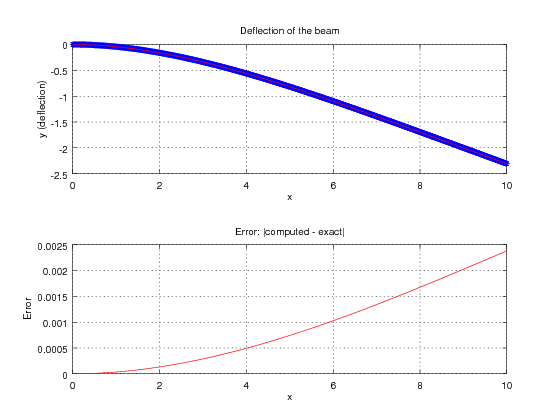

In [7]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

In [2]:

% vector that contains error values
ErrorsBothFixed = [];
n = 10; % number of subintervals on [0, L]
for i=1:100 
    h = L/n; % discretization spacing
    N = n + 1; % number of unknowns to be solved for

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);
    f(1) = f(N) = 0;

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, N);
    dp1 = dm1 = -4*ones(1, N-1);
    dp2 = dm2 = ones(1, N-2);
    % Fixed left end
    d0(1) = 1.0; d0(2) = 7.0;
    dp1(1) = 0.0;
    dp2(1) = 0.0;
    dm1(1) = 0.0;
    dm2(1) = 0.0;
    % Fixed right end
    d0(N) = 1.0; d0(N-1) = 7.0;
    dp1(N-1) = 0.0;
    dp2(N-2) = 0.0;
    dm1(N-1) = 0.0;
    dm2(N-2) = 0.0;
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots

    x = (0:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrorsBothFixed(i) = max(abs(y-y_exact));
    n = n + 10;
    N = n + 1;
    
    
endfor

ErrorsBothFixed = ErrorsBothFixed'

ErrorsBothFixed =

   3.8504e-03
   9.6261e-04
   4.2783e-04
   2.4065e-04
   1.5402e-04
   1.0696e-04
   7.8580e-05
   6.0163e-05
   4.7536e-05
   3.8504e-05
   3.1822e-05
   2.6739e-05
   2.2784e-05
   1.9645e-05
   1.7113e-05
   1.5041e-05
   1.3323e-05
   1.1884e-05
   1.0666e-05
   9.6261e-06
   8.7311e-06
   7.9554e-06
   7.2787e-06
   6.6848e-06
   6.1607e-06
   5.6959e-06
   5.2818e-06
   4.9113e-06
   4.5784e-06
   4.2783e-06
   4.0067e-06
   3.7602e-06
   3.5358e-06
   3.3308e-06
   3.1432e-06
   2.9710e-06
   2.8126e-06
   2.6665e-06
   2.5315e-06
   2.4066e-06
   2.2906e-06
   2.1828e-06
   2.0825e-06
   1.9889e-06
   1.9015e-06
   1.8197e-06
   1.7431e-06
   1.6712e-06
   1.6037e-06
   1.5402e-06
   1.4804e-06
   1.4240e-06
   1.3708e-06
   1.3205e-06
   1.2730e-06
   1.2279e-06
   1.1852e-06
   1.1448e-06
   1.1063e-06
   1.0698e-06
   1.0350e-06
   1.0019e-06
   9.7041e-07
   9.4036e-07
   9.1169e-07
   8.8431e-07
   8.5815e-07
   8.3314e-07
   8.0921e-07
   7.8630e-07
 